In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

<b>Does sleep deprivation cause us to be either more or less aggressie? To test
    this assumption, a psychologist randomly assigns volunteer subjects to sleep-deprivation
    periods of either 0, 24, or 48 hours (independent variable). Subsequently, subjects are tested
    for agressive behaviour. Aggressioin scores (dependent variable) indicate the total number of 
    different agressive behaviour.
</b>

In [5]:
def ANOVA_REP(groups, alpha):
    group_mean = [np.mean(group) for group in groups]
    subject_mean = [np.mean(subject) for subject in zip(*groups)]
    grand_mean = np.mean(group_mean)
    k = len(groups)
    N = sum([len(group) for group in groups])
    SSB = sum( len(group) * (group_mean[i] - grand_mean)**2 \
                for i, group in enumerate(groups) )
    SSW = sum( (x - group_mean[i])**2 \
                for i, group in enumerate(groups) for x in group )
    SSS = sum( k * (subject_mean[i] - grand_mean)**2 \
                for i, group in enumerate(groups) )
    SSE = SSW - SSS
    dfb = k - 1
    dfw = N - k
    dfs = len(groups[0]) - 1
    dfe = dfw - dfs
    MSB = SSB/dfb
    MSE = SSE/dfe
    F = MSB/MSE
    critical = stats.f.ppf(1-alpha, dfb, dfe)

    print("Critical Value =", critical)
    print("F Statistic =", F)
    if F > critical: 
        print("Reject Null Hypothesis")
    else:
        print("Accept Null Hypothesis")

    x = np.linspace(0, 50, 1000) #adjust as required
    y = stats.f.pdf(x, dfb, dfe)
    plt.figure(figsize = (10, 8)) #adjust if you need to
    plt.plot(x, y, color = 'blue', label = 'F Distribution')
    plt.axvline(x = F, color = 'green', linestyle = '--', label = 'F Statistic')
    plt.fill_between(x, y, color = 'red', where = (x > critical), alpha = 0.5, label = 'Critical Region')

    plt.xlabel('F Score')
    plt.ylabel('Probability Density')
    plt.title('One Way ANOVA (Repeated Measure) Test')
    plt.legend()
    plt.show()

In [3]:
df = pd.read_csv('sleep_deprivation.csv')
df

,Subject,Zero,Twenty_Four,Forty_Eight
0,A,0,3,6
1,B,4,6,8
2,C,2,6,10


Critical Value = 6.944271909999155
F Statistic = 27.0
Reject Null Hypothesis


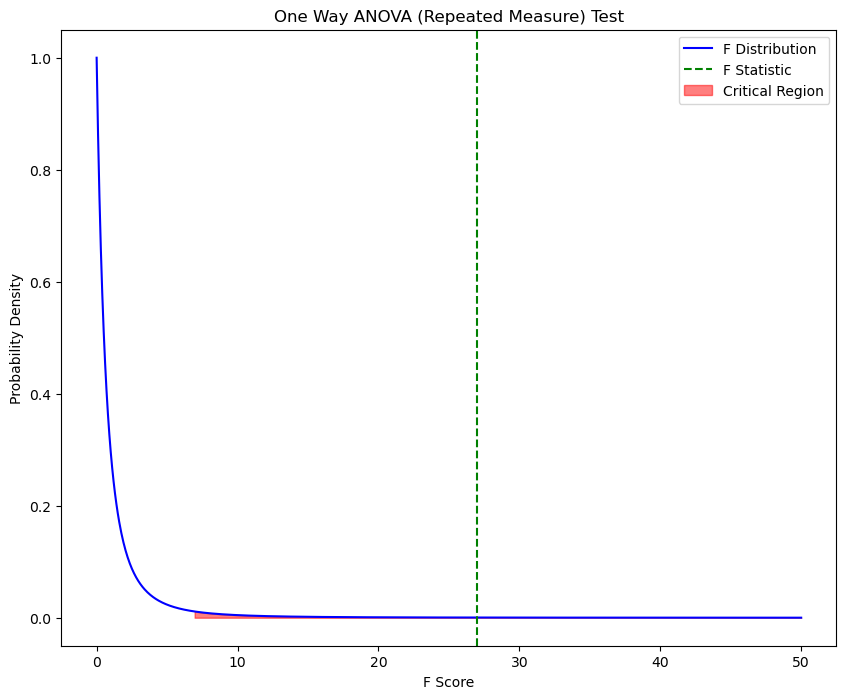

In [8]:
groups = [df['Zero'], df['Twenty_Four'], df['Forty_Eight']]
groups = [list(x) for x in groups]
alpha = 0.05
ANOVA_REP(groups, alpha)